In [2]:
!pip install pandas

In [2]:
!pip install numpy seaborn matplotlib

First 5 rows are: 
                                         name                     author  \
0                  Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                            The Burning Maze      Writtenby:RickRiordan   
2                                The Deep End       Writtenby:JeffKinney   
3                        Daughter of the Deep      Writtenby:RickRiordan   
4  The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   

                    narrator                time releasedate language  \
0      Narratedby:BillLobely   2 hrs and 20 mins    04-08-08  English   
1   Narratedby:RobbieDaymond   13 hrs and 8 mins    01-05-18  English   
2      Narratedby:DanRussell    2 hrs and 3 mins    06-11-20  English   
3  Narratedby:SoneelaNankani  11 hrs and 16 mins    05-10-21  English   
4  Narratedby:JesseBernstein              10 hrs    13-01-10  English   

                           stars   price  
0     5 out of 5 stars34 ratings  468.00  

C:\Users\Hoang\AppData\Local\Temp\ipykernel_8624\3810085913.py:86: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stars"].fillna("0",inplace =True)
C:\Users\Hoang\AppData\Local\Temp\ipykernel_8624\3810085913.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

'ax = fig.add_axes([0.5,0,0.8,0.5])\nauthors = df["author"].value_counts()\nauthors_labels = authors[:10].index\nauthors_sizes = authors[:10].values\nplt.pie(authors_sizes,labels=authors_labels)\nplt.show()'

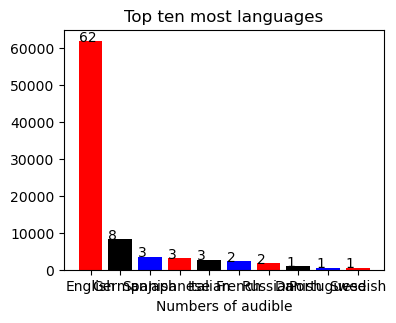

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import data
df = pd.read_csv(r"C:\Users\Hoang\Data analysis\Datasets\audible_uncleaned.csv")
#set max width

#first 5 rows
print(f"First 5 rows are: \n{df.head()}") 
print(df.info())

#Overview dataset
print(df.describe())

#DATA CLEANING
#check missing values from columns
print(f"Missing values from columns are: \n{df.isnull().sum()}")

#check duplicated values
print(f"Duplicated values are: \n{df.duplicated().sum()}")

#Clean the author columns ==> remove writtenby, create a space between firstname and last name
df["author"] = df["author"].str.replace(r"Writtenby:","").str.replace(r"([a-z])([A-Z])",r"\1 \2",regex = True)

#convert to string type
df["author"] = df["author"].astype("string")

#Clean the author columns ==> remove writtenby, create a space between firstname and last name
df["narrator"] = df["narrator"].str.replace(r"Narratedby:","").str.replace(r"([a-z])([A-Z])",r"\1 \2",regex = True)

#convert to string
df["narrator"] = df["narrator"].astype("string")


# Lets remove all nums so that we can see what unique in time column

#df["time"] = df["time"].str.replace(r"\d+","",regex=True)
#df["time"].unique()

# so we have array([' hrs and  mins', ' hrs', ' hrs and  min', ' hr and  mins',' mins', ' hr', ' hr and  min', ' min', 'Less than  minute'],dtype=object)
# remove "less than" string 
df["time"] = df["time"].str.replace(r"less than","",case = False,regex =True)

#extract hours and mins from time column
df[["Hours","Mins"]] = df["time"].str.extract(r"(?:(\d+)\s*h?r?s?)?\s(?:and)?\s*(?:(\d+)\s*mi?n?s?)?",expand =True)

# convert NaN to 0
df.fillna(0,inplace=True)

# convert hours and mins to integer
df[["Hours","Mins"]]=df[["Hours","Mins"]].astype(int)

# calculate total minute
df["TimetoMins"] = df["Hours"]*60 + df["Mins"]

#drop hours and mins columns
df.drop(columns =["Hours","Mins"],inplace=True)

# convert release date column data to date type
df["releasedate"] = pd.to_datetime(df["releasedate"], format="%d-%m-%y",errors="coerce")

#Ensure consistency in ‘language’ column: Capitalize uniformly, check for misspellings, and remove additional characters.
df["language"] = df["language"].str.title()

#Convert data to string
df["language"] = df["language"].astype("string")

# remove numbers in stars column so that we can see all unique

#df["stars"] = df["stars"].str.replace(r"([\d+.])","",regex=True)
#df["stars"].unique()
# so we got array([' out of  stars ratings', 'Not rated yet', ' out of  stars rating',' out of  stars, ratings'], dtype=object)

# convert Not rated yet to 0
#df["stars"].value_counts().get('Not rated yet', 0)

# convert starts column to string type 
df["stars"] = df["stars"].astype(str)
# extract stars, ratings                                  
pattern = r"([\d.]+) out of [\d.]+ stars.*?([\d,]+) ratings"
df[["Stars","Ratings"]] = df["stars"].str.extract(pattern,expand = True)

# Convert NA to 0
df["Stars"].fillna("0",inplace =True)
df["Ratings"].fillna("0", inplace = True)

# remove comma in ratings
df["Ratings"] = df["Ratings"].str.replace(r",","",regex = True).astype(float)
df["Stars"] = df["Stars"].astype(float)

# drops stars column
df.drop(columns = ["stars"],inplace=True)
df.drop(columns = ["time"],inplace=True)

# Investigate ‘price’ column

# convert dtype to str
df["price"] = df["price"].astype(str)
# remove all digits to see unique data
# df["price"] = df["price"].str.replace(r"[\d.]+","",regex=True)
# df["price"].unique()
# we have array(['', ',', 'Free'], dtype=object)

# covert free to 0
df["price"] = df["price"].str.replace(r"free","0",case = False,regex = True).str.replace(",","")

#convert dtype to float
df["price"] = df["price"].astype(float)

# EDA


# bar chart top 10 language 

fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
language = df["language"].value_counts()
categories = language[0:10].index
bar_language_values = language[:10].values


bars=plt.bar(categories,bar_language_values,color =["red","black","blue"])
plt.title("Top ten most languages")
plt.xlabel("Numbers of audible")

for bar in bars:
    plt.text(bar.get_xy()[0],bar.get_height(),f"{round(bar.get_height()/1000)}")



"""ax = fig.add_axes([0.5,0,0.8,0.5])
authors = df["author"].value_counts()
authors_labels = authors[:10].index
authors_sizes = authors[:10].values
plt.pie(authors_sizes,labels=authors_labels)
plt.show()"""



           












In [121]:
import pandas as pd

# Sample DataFrame
data = {'Duration': ['3 hrs and 15 mins', '2 hrs', '4 hrs and 1 min', '1 hr and 30 mins','45 mins', '1 hr', '1 hr and 1 min', '1 min', 'Less than 5 minute']}
df = pd.DataFrame(data)
print(df)
df["Duration"] = df["Duration"].str.replace(r"Less than","",case = False)
df[["Hours","Mins"]] = df["Duration"].str.extract(r"(?:(\d+)\s*h?r?s?)?\s(?:and)?\s*(?:(\d+)\s*mi?n?s?)?",expand=True)
df.fillna(0

             Duration
0   3 hrs and 15 mins
1               2 hrs
2     4 hrs and 1 min
3    1 hr and 30 mins
4             45 mins
5                1 hr
6      1 hr and 1 min
7               1 min
8  Less than 5 minute


,Duration,Hours,Mins
0,3 hrs and 15 mins,3,15
1,2 hrs,2,0
2,4 hrs and 1 min,4,1
3,1 hr and 30 mins,1,30
4,45 mins,45,0
5,1 hr,1,0
6,1 hr and 1 min,1,1
7,1 min,1,0
8,5 minute,0,5


In [198]:
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({"Duration": ["5 out of 5 stars34 ratings", "4.5 out of 5 stars41 ratings", "4.5 out of 5 stars1 ratings", "4.5 out of 5 stars1, ratings"]})

# Extract hours using regex
df["Duration"] = df["Duration"].astype("string")
pattern = r'([\d.]+) out of [\d.]+ stars.*?([\d,]+) ratings'
df[['Stars',"Ratings"]] = df["Duration"].str.extract(pattern,expand=True)
df


,Duration,Stars,Ratings
0,5 out of 5 stars34 ratings,5,34
1,4.5 out of 5 stars41 ratings,4.5,41
2,4.5 out of 5 stars1 ratings,4.5,1
3,"4.5 out of 5 stars1, ratings",4.5,"1,"


In [120]:
import pandas as pd

data = {'Names': ["Dr. John Smith", "Ms. Alice Johnson", "Mr. Bob White", "Mrs. Emma Brown"]}
df = pd.DataFrame(data)
df["Names"] = df["Names"].str.replace(r"(?:Dr|Mr|Ms|Mrs)\.\s*(\w+)\s*(?:\w+)",r"\1",regex = True)
df


,Names
0,John
1,Alice
2,Bob
3,Emma


In [27]:
import pandas as pd

data = {'Files': ["document.txt", "report.pdf", "photo.jpg", "data.csv", "notes.docx"]}
df = pd.DataFrame(data)

#Given a list of filenames, extract only the file extensions (e.g., .txt, .csv, .jpg).
df["Files"] = df["Files"].str.replace(r"(?:\w+)(\.)(\w+)",r"\1\2",regex=True)
df

,Files
0,.txt
1,.pdf
2,.jpg
3,.csv
4,.docx


In [61]:
import pandas as pd

data = {'HTML': ["<p>Hello</p>", "<b>Bold</b>", "<i>Italic</i>", "<h1>Title</h1>"]}
df = pd.DataFrame(data)

#Given a column containing HTML snippets, remove the opening and closing tags while keeping the content.
df["HTML"]=df["HTML"].str.replace(r"(<[^>]+>)(?:\w+)(<[^>]+>)",r"",regex=True)
df

,HTML
0,
1,
2,
3,


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import data
df = pd.read_csv(r"C:\Users\Hoang\Data analysis\Datasets\audible_uncleaned.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


In [65]:
import matplotlib.pyplot as plt

fig,ax = plt.subplot(2,2)

ax[0, 0].set_title("Top Left")
ax[0, 1].set_title("Top Right")
ax[1, 0].set_title("Bottom Left")
ax[1, 1].set_title("Bottom Right")

plt.show()


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [63]:
data = (5,6)
data[0]



5